In [23]:
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [2]:
df = pd.read_csv("Boston.csv")
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.drop(['Unnamed: 0'], inplace=True, axis = 1)

In [5]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


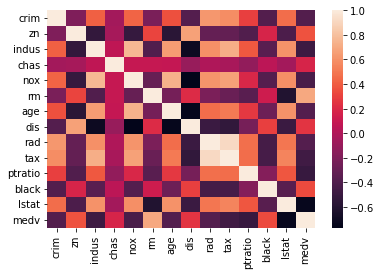

In [6]:
dataplot = sb.heatmap(df.corr(),annot=False)

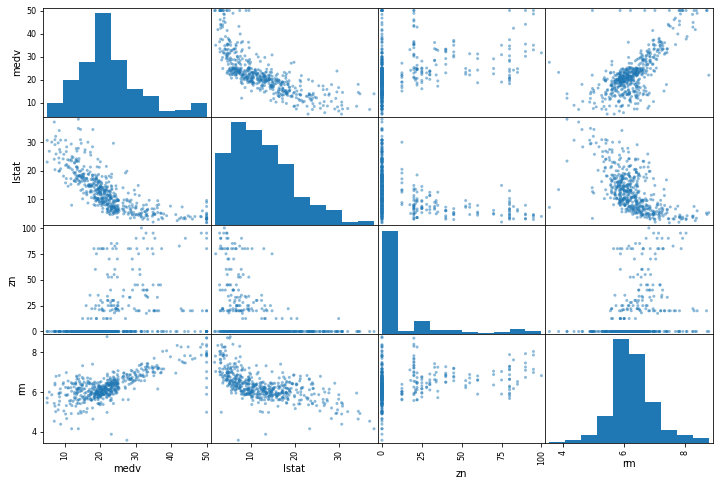

In [8]:
from pandas.plotting import scatter_matrix

cols = ["medv","lstat","zn","rm"]

plot = scatter_matrix(df[cols],figsize=(12,8))


In [11]:
corr = df.corr()
corr['medv'].sort_values(ascending=False)

medv       1.000000
rm         0.695360
zn         0.360445
black      0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(['medv'], axis=1),df['medv'],random_state=42,test_size=0.2)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential(layers = [
    Dense(64,input_shape=(x_train_scaled.shape[1],),activation="relu"),
    Dense(32,activation="relu"),
    Dense(16,activation="relu"),
    Dense(1,activation="linear")
])

model.compile(optimizer="adam",loss="mse",metrics=['mae'])
model.summary()

D:\Anaconda\envs\pytorch\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(x_train_scaled,y_train,validation_split=0.2,epochs=100,verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 648.7156 - mae: 23.5905 - val_loss: 552.1743 - val_mae: 21.9439
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 630.7943 - mae: 23.1008 - val_loss: 532.1233 - val_mae: 21.4688
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 564.3825 - mae: 21.6203 - val_loss: 506.4572 - val_mae: 20.8574
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 556.7324 - mae: 21.6469 - val_loss: 468.5025 - val_mae: 19.9222
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 523.0571 - mae: 20.7510 - val_loss: 414.1528 - val_mae: 18.4974
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 405.4885 - mae: 18.1816 - val_loss: 339.0253 - val_mae: 16.4299
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 352.2260 - mae: 16.2725 - val_loss: 243.3616 - val_mae: 13.5859
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 240.1351 - mae: 12.8550 - val_loss: 144.8732 - val_mae: 9.8799
Epoch 9/100
11/1

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.7551 - mae: 2.2947 - val_loss: 15.4422 - val_mae: 2.7631
Epoch 55/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.5815 - mae: 2.4660 - val_loss: 15.3945 - val_mae: 2.7419
Epoch 56/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.7880 - mae: 2.2924 - val_loss: 15.2471 - val_mae: 2.7254
Epoch 57/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.6970 - mae: 2.3197 - val_loss: 15.0104 - val_mae: 2.7113
Epoch 58/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.5129 - mae: 2.3909 - val_loss: 14.7388 - val_mae: 2.7014
Epoch 59/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.2430 - mae: 2.3278 - val_loss: 14.6097 - val_mae: 2.7324
Epoch 60/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.0448 - mae: 2.3309 - val_loss: 14.4949 - val_mae: 2.7173
Epoch 61/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.6011 - mae: 2.2239 - val_loss: 14.3781 - val_mae: 2.6921
Epoch 62/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - lo

In [24]:
# Evaluate the model

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the test set
y_pred = model.predict(x_test_scaled)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(r2)

print(f"Test MAE: {mae:.2f}")
print(f"Test RMSE: {rmse:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
0.8350851870994382
Test MAE: 2.41
Test RMSE: 3.48
